In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_excel('S-FFC.xlsx')
data['diam'] = data['diameter'].apply(lambda x: float(x.split('-')[0]))

In [59]:
data['cum_percent'] =data['diff_percent'].cumsum()

C:\Users\swan47\AppData\Local\Temp\ipykernel_48352\1755704250.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1000)


(4.095623133960538, 1000)

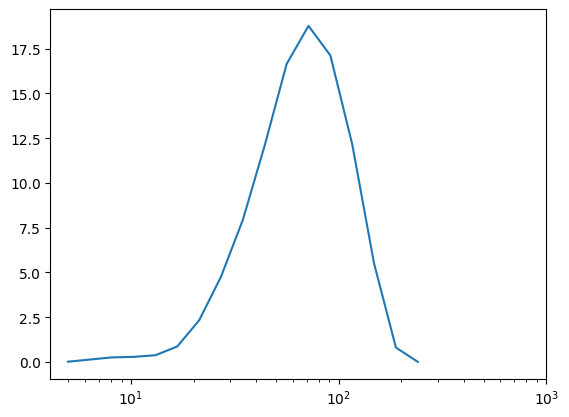

In [36]:
xs = data['diam']
ys = data['diff_percent']
plt.plot(xs,ys)
plt.gca().set_xscale('log')
plt.xlim(0,1000)

(0.0, 250.0)

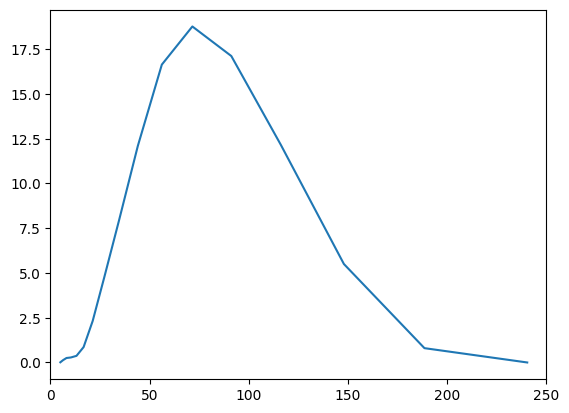

In [128]:
xs = data['diam']
ys = data['diff_percent']
plt.plot(xs,ys)
#plt.gca().set_xscale('log')
plt.xlim(0,250)

C:\Users\swan47\AppData\Local\Temp\ipykernel_48352\636258314.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1000)


(4.095623133960538, 1000)

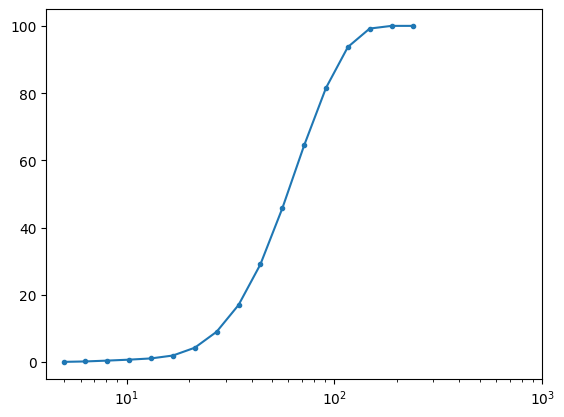

In [129]:
xs = data['diam']
ys = data['cum_percent']
plt.plot(xs,ys,marker='.')
plt.gca().set_xscale('log')
plt.xlim(0,1000)

In [175]:
xs

0       0.01
1       0.14
2       0.39
3       0.67
4       1.04
5       1.90
6       4.22
7       8.98
8      16.92
9      29.02
10     45.66
11     64.43
12     81.55
13     93.71
14     99.21
15    100.01
16    100.01
Name: cum_percent, dtype: float64

In [234]:
# Create a smooth interpolation function
import numpy as np
from scipy.interpolate import interp1d
xs = np.log10(data['diam'])
ys = data['cum_percent']

smooth_interp = interp1d(xs, ys, kind='cubic')  # You can choose 'linear', 'quadratic', or 'cubic'
x_interp = np.linspace(min(xs), max(xs), 200)  
y_interp = smooth_interp(x_interp)

In [242]:
idx = np.where(y_interp>=100)[0][0]-1


In [244]:
idx

180

In [245]:
y_interp[idx:] = np.linspace(y_interp[idx:][0],100,len(y_interp[idx:]))

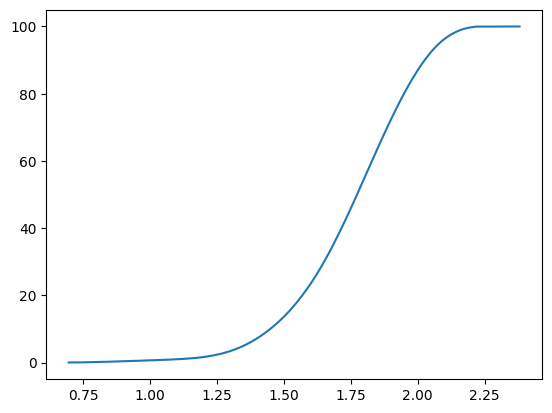

In [246]:
plt.plot(x_interp, y_interp)


In [230]:
data2 = pd.DataFrame()
data2['diam'] = 10**x_interp
data2['cum_percent'] = y_interp

In [231]:
data2['diff_percent'] = data2['cum_percent'].diff()

In [225]:
T1 =53
T2 = 100

sample1 = data[data['diam']<T1].copy()
sample1['diff_percent2'] =  sample1['diff_percent']/(sample1['diff_percent'].sum())
sample1['cum_percent2'] = sample1['diff_percent2'].cumsum()

sample2 = data[(data['diam']>=T1)&(data['diam']<=T2)].copy()
sample2['diff_percent2'] =  sample2['diff_percent']/(sample2['diff_percent'].sum())
sample2['cum_percent2'] = sample2['diff_percent2'].cumsum()

sample3 = data[data['diam']>T2].copy()
sample3['diff_percent2'] =  sample3['diff_percent']/(sample3['diff_percent'].sum())
sample3['cum_percent2'] = sample3['diff_percent2'].cumsum()

In [260]:
# Rename the original DataFrame 'data' to 'data2'

# Define new values for T1 and T2
T1 = 54
T2 = 120

# Sample 1
sample1 = data2[data2['diam'] < T1].copy()
sample1['diff_percent2'] = sample1['diff_percent'] / sample1['diff_percent'].sum()
sample1['cum_percent2'] = sample1['diff_percent2'].cumsum()

# Sample 2
sample2 = data2[(data2['diam'] >= T1) & (data2['diam'] <= T2)].copy()
sample2['diff_percent2'] = sample2['diff_percent'] / sample2['diff_percent'].sum()
sample2['cum_percent2'] = sample2['diff_percent2'].cumsum()

# Sample 3
sample3 = data2[data2['diam'] > T2].copy()
sample3['diff_percent2'] = sample3['diff_percent'] / sample3['diff_percent'].sum()
sample3['cum_percent2'] = sample3['diff_percent2'].cumsum()


Text(0.5, 1.0, 'Sample 3')

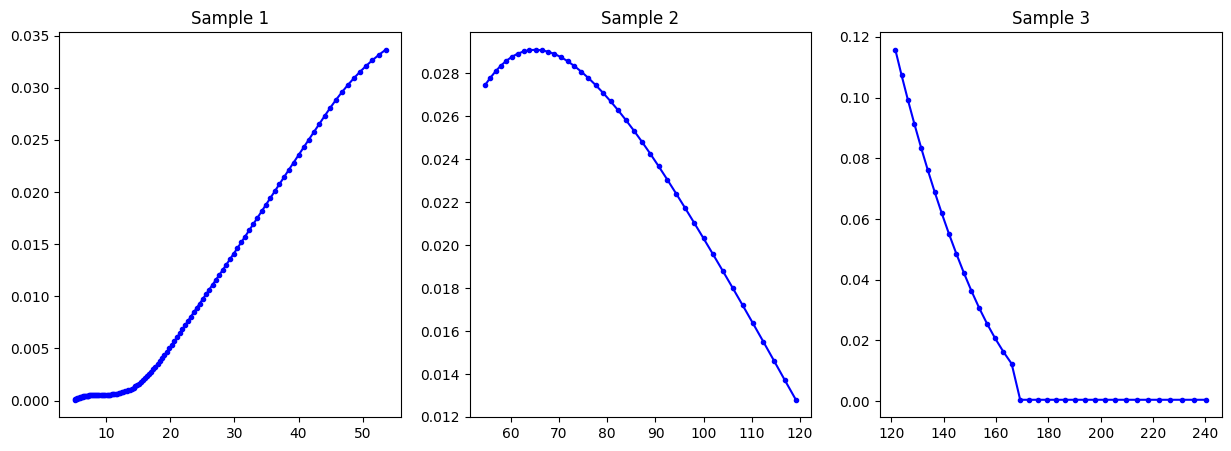

In [261]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Sample 1
axes[0].plot(sample1['diam'], sample1['diff_percent2'], label='Sample 1', c='b',marker='.')
axes[0].set_title('Sample 1')



# Plot Sample 1
axes[1].plot(sample2['diam'], sample2['diff_percent2'], label='Sample 1', c='b',marker='.')
axes[1].set_title('Sample 2')


# Plot Sample 1
axes[2].plot(sample3['diam'], sample3['diff_percent2'], label='Sample 1', c='b',marker='.')
axes[2].set_title('Sample 3')


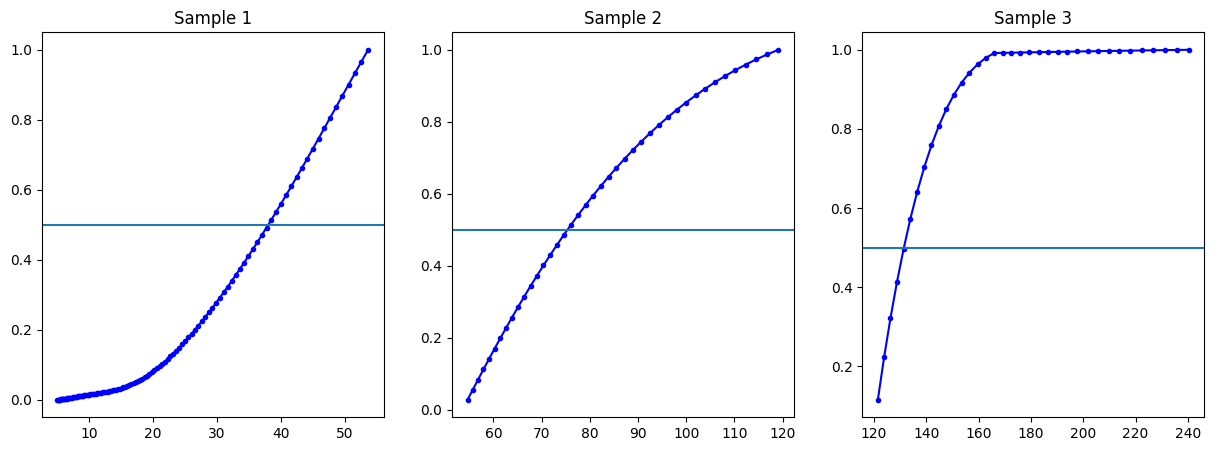

In [262]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Sample 1
axes[0].plot(sample1['diam'], sample1['cum_percent2'], label='Sample 1', c='b',marker='.')
axes[0].set_title('Sample 1')
axes[0].axhline(y =0.5)



# Plot Sample 1
axes[1].plot(sample2['diam'], sample2['cum_percent2'], label='Sample 1', c='b',marker='.')
axes[1].set_title('Sample 2')
axes[1].axhline(y =0.5)


# Plot Sample 1
axes[2].plot(sample3['diam'], sample3['cum_percent2'], label='Sample 1', c='b',marker='.')
axes[2].set_title('Sample 3')
axes[2].axhline(y =0.5)


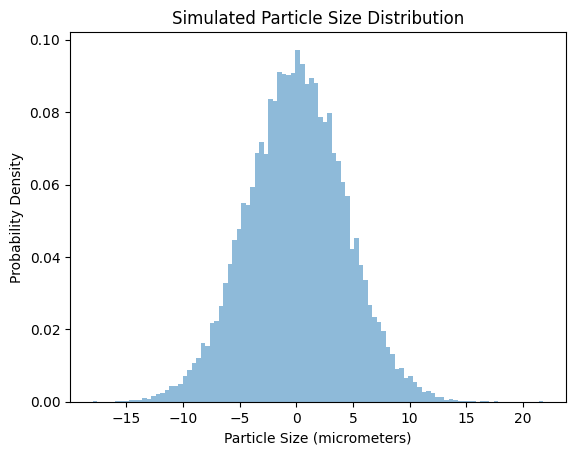

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define the particle size distribution parameters
min_size = 0.0  # Minimum particle size (e.g., micrometers)
max_size = 10.0  # Maximum particle size (e.g., micrometers)
num_particles = 30000  # Number of particles to simulate

# Generate random particle sizes based on a uniform distribution
particle_sizes = np.random.lognormal(min_size, max_size, num_particles)

# Plot the histogram of the simulated particle sizes
plt.hist(np.log10(particle_sizes), bins=100, density=True, alpha=0.5)
plt.xlabel('Particle Size (micrometers)')
plt.ylabel('Probability Density')
plt.title('Simulated Particle Size Distribution')
plt.show()
